In [12]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [13]:
train  = pd.read_csv('tweets_data.csv')

In [14]:
train[train['label'] == 0].head(10)

,Unnamed: 0,id,label,tweet
0,0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,2,3,0,bihday your majesty
3,3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,4,5,0,factsguide: society now #motivation
5,5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [15]:
train[train['label'] == 1].head(10)

,Unnamed: 0,id,label,tweet
13,13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,17,18,1,retweet if you agree!
23,23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,56,57,1,@user lets fight against #love #peace
68,68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [16]:
train.shape

(31962, 4)

In [17]:
train.drop(['Unnamed: 0'], axis=1)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [18]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [19]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [20]:
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['tweet'], "@[\w]*") 
train.head()

,Unnamed: 0,id,label,tweet,tidy_tweet
0,0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,2,3,0,bihday your majesty,bihday your majesty
3,3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [21]:
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
train.head(10)

,Unnamed: 0,id,label,tweet,tidy_tweet
0,0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,2,3,0,bihday your majesty,bihday your majesty
3,3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,4,5,0,factsguide: society now #motivation,factsguide society now #motivation
5,5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,9,10,0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [22]:
tokenized_tweets = train['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
print(tokenized_tweets)

0                                                  [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run]
1                                  [thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked]
2                                                                                                                                         [bihday, your, majesty]
3                                                                                                     [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                                                         [factsguide, society, now, #motivation]
                                                                                   ...                                                                           
31957                       

In [23]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

for tokenized_tweet in tokenized_tweets:
    for token in tokenized_tweet:
        if token in stop_words:
            tokenized_tweet.remove(token)

print(tokenized_tweets)            

0                                                      [a, father, dysfunctional, is, selfish, drags, kids, his, dysfunction, #run]
1                            [thanks, #lyft, credit, can, use, cause, don, offer, wheelchair, vans, pdx, #disapointed, #getthanked]
2                                                                                                                 [bihday, majesty]
3                                                                                         [#model, love, u, take, u, the, time, ur]
4                                                                                                [factsguide, society, #motivation]
                                                                    ...                                                            
31957                                                                                                             [ate, isz, youuu]
31958    [see, nina, turner, airwaves, trying, wrap, in, the, mantle, a, gen

In [24]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [25]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
    
train['tidy_tweet'] = tokenized_tweets

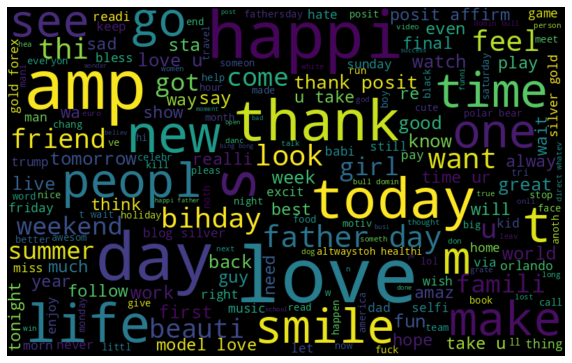

In [26]:
all_words = ' '.join([text for text in train['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

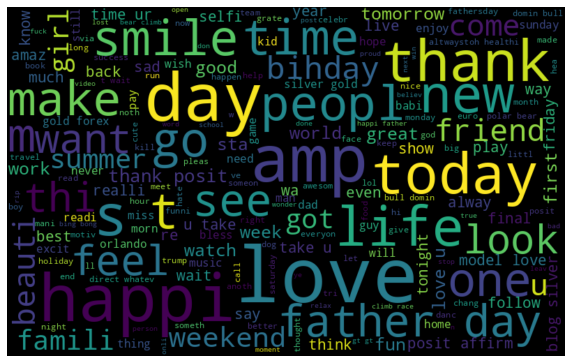

In [27]:
normal_words =' '.join([text for text in train['tidy_tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

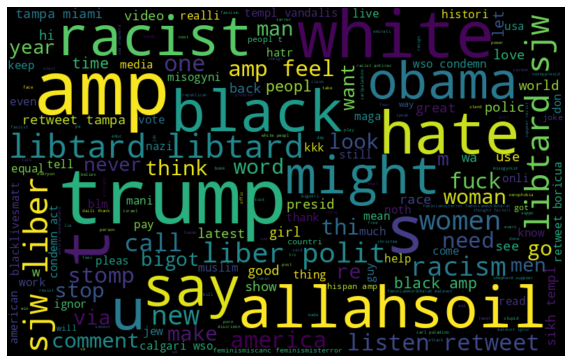

In [28]:
normal_words =' '.join([text for text in train['tidy_tweet'][train['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [29]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [30]:
# extracting hashtags from non positive tweets

HT_regular = hashtag_extract(train['tidy_tweet'][train['label'] == 0])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(train['tidy_tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

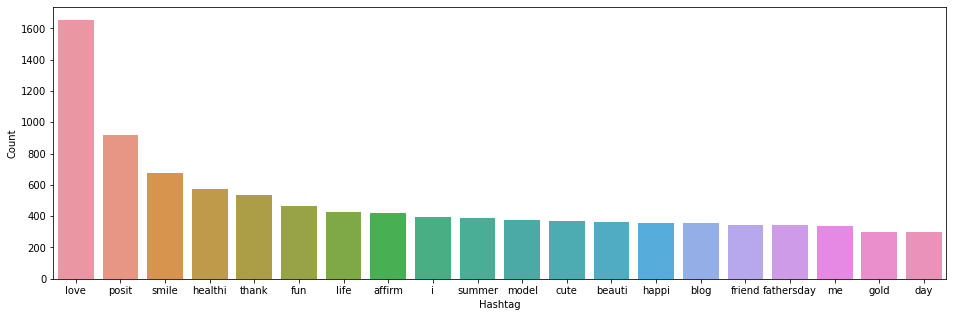

In [31]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

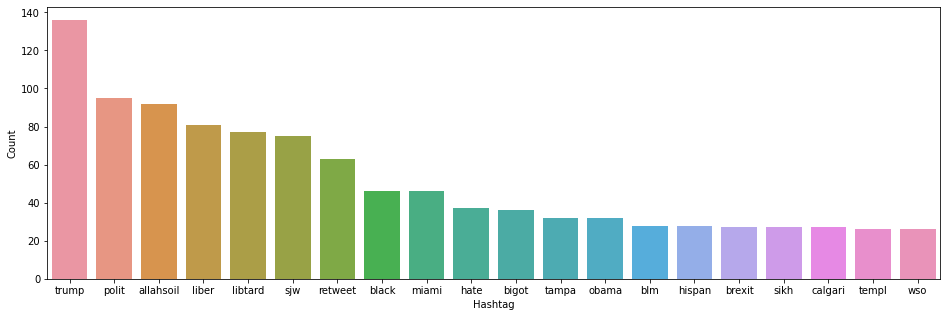

In [32]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [33]:
!pip3 install gensim

    100% |████████████████████████████████| 23.9MB 39kB/s eta 0:00:01    45% |██████████████▋                 | 10.9MB 2.0MB/s eta 0:00:07
    100% |████████████████████████████████| 61kB 308kB/s ta 0:00:01


In [8]:
!pip3 install --upgrade numpy

    100% |████████████████████████████████| 13.8MB 76kB/s eta 0:00:01


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [34]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['tidy_tweet'])
bow.shape

(31962, 1000)

In [35]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(train['tidy_tweet'])
tfidf.shape

(31962, 1000)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

In [42]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [45]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

predicted=lreg.predict(xvalid_bow)

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

print(f1_score(yvalid, prediction_int)) # calculating f1 score
print(accuracy_score(yvalid,predicted))

0.5586776859504132
0.9453540515173636


In [46]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [47]:
lreg.fit(xtrain_tfidf, ytrain)

predicted=lreg.predict(xvalid_tfidf)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

print(f1_score(yvalid, prediction_int))
print(accuracy_score(yvalid,predicted))


0.5486415425065732
0.9468140577745333


In [48]:
from sklearn import svm

In [49]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

predicted=svc.predict(xvalid_bow)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
print(f1_score(yvalid, prediction_int))
print(accuracy_score(yvalid,predicted))

0.5237668161434977
0.9467097716133069


In [50]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

predicted=svc.predict(xvalid_tfidf)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
print(f1_score(yvalid, prediction_int))
print(accuracy_score(yvalid,predicted))

0.5372340425531915
0.9469183439357597


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

predicted=rf.predict(xvalid_bow)

prediction = rf.predict(xvalid_bow)
print(f1_score(yvalid, prediction))
print(accuracy_score(yvalid,predicted))

0.5245653817082389
0.9344040045885911


In [53]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

predicted=rf.predict(xvalid_tfidf)

prediction = rf.predict(xvalid_tfidf)
print(f1_score(yvalid, prediction))
print(accuracy_score(yvalid,predicted))

0.5745654162854529
0.9515069350297215
